# Init

![Task](image.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tabulate as tb

Data = np.array([
    19.8, 19.1, 19.3, 18.8, 20.2, 20.8, 20.7, 19.7, 19.6, 19.2, 20.9, 20.9, 20.2,
    19.6, 20.4, 20.4, 20.2, 20.4, 18.9, 19.7, 19.8, 20.6, 20.7, 19.7, 20.3, 19.8,
    20.4, 20.3, 20.6, 20.5, 20.4, 20.5, 20.3, 20.5, 20.2, 20.5, 20.7, 21.0, 20.4,
    20.8, 20.5, 20.4, 20.6, 21.0, 20.4, 20.4, 20.3, 19.7, 19.9, 20.1
], type(float))

lenData = len(Data)
# print(tb.tabulate(np.array_split(Data, 10)))


# Frequencies

## Discrete series

In [2]:
sortedData = np.sort(Data)
orderedData, frequency = np.unique(sortedData, return_counts=True)
lenOrderedData = len(orderedData)
barColumnSize = (orderedData[-1] - orderedData[0]) / lenOrderedData

---------  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  --
Xi         18.8  18.9  19.1  19.2  19.3  19.6  19.7  19.8  19.9  20.1  20.2  20.3  20.4  20.5  20.6  20.7  20.8  20.9  21
Frequency   1     1     1     1     1     2     4     3     1     1     4     4     9     5     3     3     2     2     2
---------  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  --


Text(0, 0.5, 'Frequency')

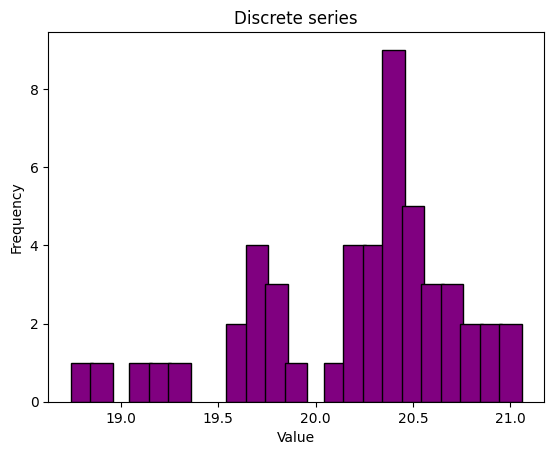

In [3]:
print(tb.tabulate([orderedData, frequency], showindex=['Xi', 'Frequency']))

bar = plt.bar(orderedData, frequency,
              color='purple', edgecolor='k',
              width=barColumnSize)
plt.title('Discrete series')
plt.xlabel('Value')
plt.ylabel('Frequency')

## Intervals series

In [4]:
R = sortedData[-1] - sortedData[0]
k = np.sqrt(lenData)
h = np.round(R / k, 1)
offset = 0.5 * h
x0 = sortedData[0] - offset
lenSeries = int(np.round(k, 1))
sessions = np.array([(.0, .0)] * lenSeries)
sessionElementsCount = np.array([1] * lenSeries)

for i in range(lenSeries):
    sessionEnd = x0 + h
    sessions[i] = (x0, sessionEnd)
    sessionElementsCount[i] = \
        np.sum(((sortedData >= x0) & (sortedData < sessionEnd)))
    x0 += h

-------------  -------------  -------------  -------------  -------------  -------------  -------------
18.65 - 18.95  18.95 - 19.25  19.25 - 19.55  19.55 - 19.85  19.85 - 20.15  20.15 - 20.45  20.45 - 20.75
2              2              1              9              2              17             11
-------------  -------------  -------------  -------------  -------------  -------------  -------------


Text(0, 0.5, 'Frequency')

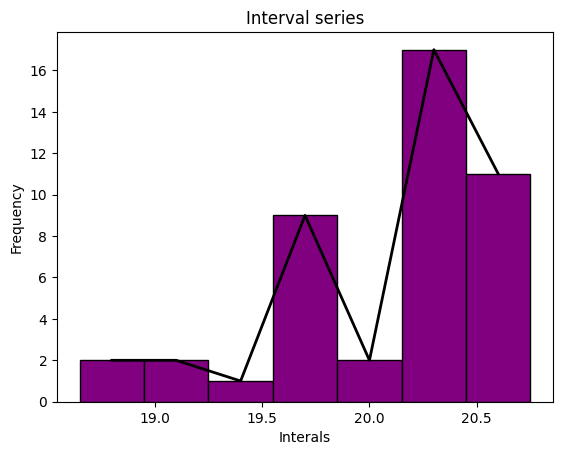

In [5]:
print(
    tb.tabulate(
        [[f'{session[0]:.2f} - {session[1]:.2f}' for session in sessions],
         sessionElementsCount]))

positions = [session[0] + offset for session in sessions]
plt.bar(positions, sessionElementsCount,
        color='purple', edgecolor='k',
        width=h)
plt.plot(positions, sessionElementsCount,
         color="k", linewidth=2)
plt.title('Interval series')
plt.xlabel('Interals')
plt.ylabel('Frequency')


## Sum curve

In [6]:
relatedFrequencies = np.array([np.round(fr / lenData, 2) for fr in frequency])
accumulatedRelativeFrequencies = [.0] * lenOrderedData
accumulatedRelativeFrequencies[0] = relatedFrequencies[0] 
for i in range(1, lenOrderedData):
    accumulatedRelativeFrequencies[i] = \
        accumulatedRelativeFrequencies[i - 1] + relatedFrequencies[i]

-----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
18.8   18.9   19.1   19.2   19.3   19.6   19.7   19.8   19.9   20.1   20.2   20.3   20.4   20.5   20.6   20.7   20.8   20.9   21
 0.02   0.02   0.02   0.02   0.02   0.04   0.08   0.06   0.02   0.02   0.08   0.08   0.18   0.1    0.06   0.06   0.04   0.04   0.04
 0.02   0.04   0.06   0.08   0.1    0.14   0.22   0.28   0.3    0.32   0.4    0.48   0.66   0.76   0.82   0.88   0.92   0.96   1
-----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----


Text(0, 0.5, 'Frequency')

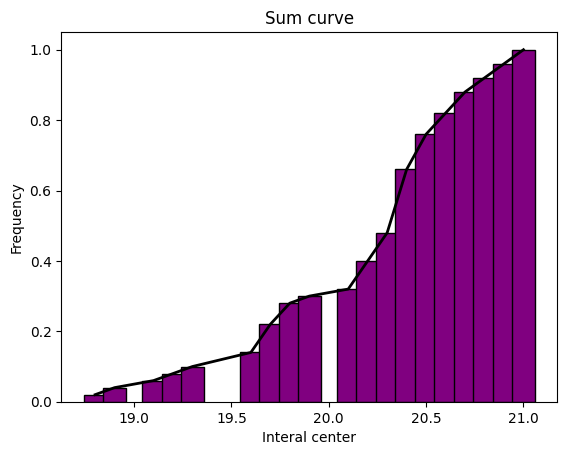

In [7]:
print(tb.tabulate(
    [orderedData,
     relatedFrequencies,
     accumulatedRelativeFrequencies]))

plt.bar(orderedData, accumulatedRelativeFrequencies,
        width=(orderedData[-1] - orderedData[0]) / lenOrderedData, color='purple', edgecolor='k')
plt.plot(orderedData, accumulatedRelativeFrequencies,
        linewidth=2, color='k')
plt.title('Sum curve')
plt.xlabel('Interal center')
plt.ylabel('Frequency')

# Task 4

In [8]:
MoX, = orderedData[np.where(frequency == frequency.max())]
MeX = .0
half = lenOrderedData / 2
if (lenOrderedData % 2 == 0):
    MeX = np.round((orderedData[half] + orderedData[half + 1]) / 2, 2)
else:
    MeX = orderedData[(int(np.round(half, 0)))]

u = np.array((orderedData - MoX) / h)


In [9]:
res = np.array([
    [orderedData[i], frequency[i], u[i],
     frequency[i] * u[i],
     frequency[i] * u[i]**2,
     frequency[i] * u[i]**3,
     frequency[i] * u[i]**4]
    for i in range(lenOrderedData)])

m1, m2, m3, m4 = 0, 0, 0, 0

for i in range(lenOrderedData):
    m1 += res[i, 3]
    m2 += res[i, 4]
    m3 += res[i, 5]
    m4 += res[i, 6]

m1 /= lenData
m2 /= lenData
m3 /= lenData
m4 /= lenData


In [10]:
headers = [
    'Xi', 'Ni', 'Ui', 'Ni * Ui',
     'Ni * Ui^2', 'Ni * Ui^3', 'Ni * Ui^4']

print(tb.tabulate(res, headers=headers, floatfmt='.2f'))

   Xi    Ni     Ui    Ni * Ui    Ni * Ui^2    Ni * Ui^3    Ni * Ui^4
-----  ----  -----  ---------  -----------  -----------  -----------
18.80  1.00  -5.33      -5.33        28.44      -151.70       809.09
18.90  1.00  -5.00      -5.00        25.00      -125.00       625.00
19.10  1.00  -4.33      -4.33        18.78       -81.37       352.60
19.20  1.00  -4.00      -4.00        16.00       -64.00       256.00
19.30  1.00  -3.67      -3.67        13.44       -49.30       180.75
19.60  2.00  -2.67      -5.33        14.22       -37.93       101.14
19.70  4.00  -2.33      -9.33        21.78       -50.81       118.57
19.80  3.00  -2.00      -6.00        12.00       -24.00        48.00
19.90  1.00  -1.67      -1.67         2.78        -4.63         7.72
20.10  1.00  -1.00      -1.00         1.00        -1.00         1.00
20.20  4.00  -0.67      -2.67         1.78        -1.19         0.79
20.30  4.00  -0.33      -1.33         0.44        -0.15         0.05
20.40  9.00   0.00       0.00     

In [11]:
print(f'M1: {m1:.2f}')
print(f'M2: {m2:.2f}')
print(f'M3: {m3:.2f}')
print(f'M4: {m4:.2f}')
s_2 = (m2 - m1**2) * h**2
s = np.sqrt(s_2)
cA = m1 * h + MoX
print(f'Chosen avarage (X̄): {cA:.2f}')
print(f'S^2 = D(X): {s_2:.2f}')
print(f'S: {s:.2f}')
print(f'V: {s / cA:.2f}')
m_3 = (m3 - 3 * m2 * m1 + 2 * m1**3) * h**3
m_4 = (m4 - 4 * m3 * m1 + 6 * m2 * m1**2 - 3 * m1**4) * h**4
print(f'm3: {m3:.2f}')
print(f'm4: {m_4:.2f}')
print(f'As: {m_3 / s**3:.2f}')
print(f'Ex: {m_4 / s**4 - 3:.2f}')


M1: -0.66
M2: 3.55
M3: -11.14
M4: 51.16
Chosen avarage (X̄): 20.20
S^2 = D(X): 0.28
S: 0.53
V: 0.03
m3: -11.14
m4: 0.25
As: -0.85
Ex: 0.13


# Task 5

In [12]:
ty = 1.984
q = 0.143
print(f'{cA - s / lenOrderedData * ty:.2f} < a < {cA + s / lenOrderedData * ty:.2f}')
print(f'{s * (1 - q):.2f} < σ < {s * (1 + q):.2f}')


20.15 < a < 20.26
0.45 < σ < 0.61
